# Lab 5



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/ic_vs_vce_transistor.png'

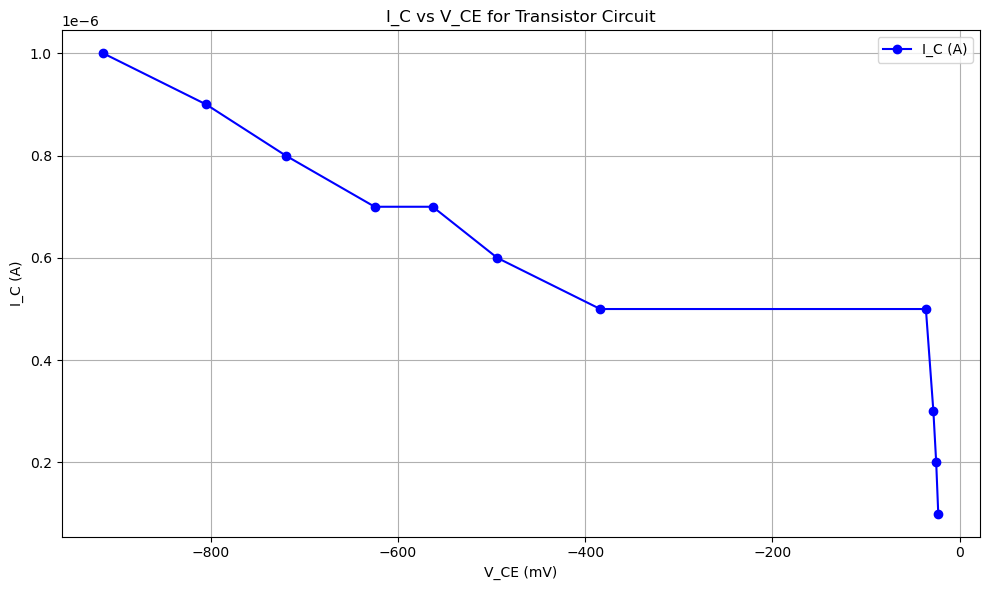

In [3]:
import matplotlib.pyplot as plt

# Data from the table
V_CC = [10.0, 9.0, 8.0, 6.8, 6.0, 5.0, 4.0, 3.5, 1.5, 1.0, 0.0]  # V_CC in Volts
I_C = [1.0, 0.9, 0.8, 0.7, 0.7, 0.6, 0.5, 0.5, 0.3, 0.2, 0.1]  # I_C in uA
V_CE = [-915, -805, -720, -625, -563, -494, -384, -36, -28, -25, -22.8]  # V_CE in mV

# Convert I_C to Amperes for the plot
I_C_A = [i * 1e-6 for i in I_C]  # from uA to A

# Create figure and plot for I_C vs V_CE
plt.figure(figsize=(10, 6))
plt.plot(V_CE, I_C_A, 'o-', label='I_C (A)', color='b')

# Adding labels and title
plt.xlabel('V_CE (mV)')
plt.ylabel('I_C (A)')
plt.title('I_C vs V_CE for Transistor Circuit')
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig('/mnt/data/ic_vs_vce_transistor.png')  # Saving the plot for download
plt.show()


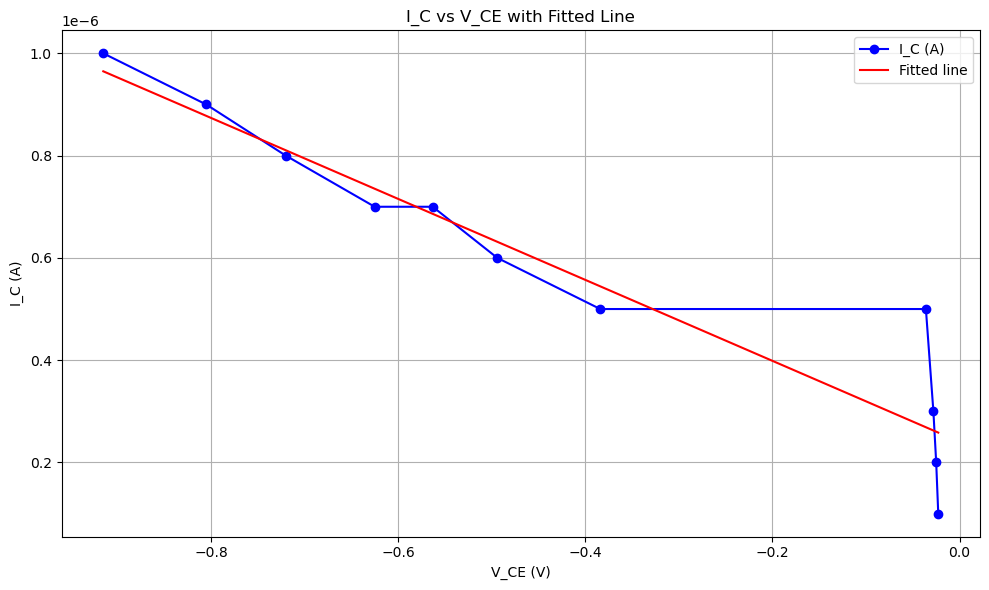

In [7]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Convert V_CE from mV to V for better scaling
V_CE_V = [v / 1000 for v in V_CE]  # Convert mV to V

# Fit a polynomial to the data
coefs = np.polyfit(V_CE_V, I_C_A, 1)  # Linear fit (degree 1)
p = np.poly1d(coefs)

# Generate values for the fitted line
V_CE_fit = np.linspace(min(V_CE_V), max(V_CE_V), 100)
I_C_fit = p(V_CE_fit)

# Create figure and plot for I_C vs V_CE with fitted function
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(V_CE_V, I_C_A, 'o-', label='I_C (A)', color='b')

# Plot the fitted line
plt.plot(V_CE_fit, I_C_fit, '-', label='Fitted line', color='r')

# Adding labels and title
plt.xlabel('V_CE (V)')
plt.ylabel('I_C (A)')
plt.title('I_C vs V_CE with Fitted Line')
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


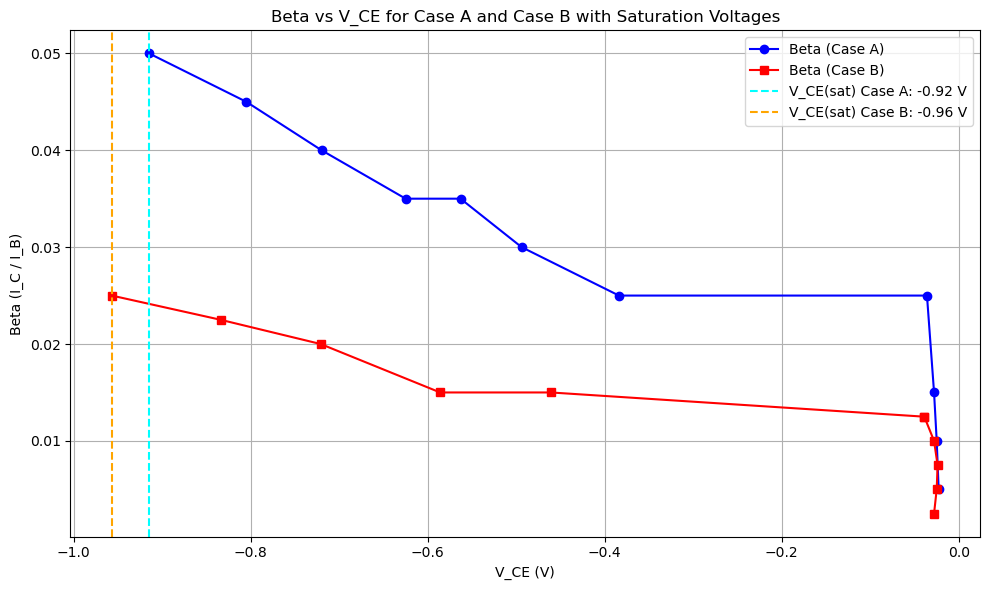

In [15]:
# Base currents for Case A and Case B
I_B_A = 20e-6  # 20 µA for Case A
I_B_B = 40e-6  # 40 µA for Case B

# Saturation Voltage V_CE(sat) estimation
V_CE_sat_A = min(V_CE_A_V)  # Approximate from the data where I_C flattens
V_CE_sat_B = min(V_CE_B_V)  # Approximate from the data where I_C flattens

# Current Gain (beta) calculation
# Beta = I_C / I_B
beta_A = np.array(I_C_A_A) / I_B_A
beta_B = np.array(I_C_B_A) / I_B_B

# Prepare to plot V_CE(sat) and Beta
V_CE_sat_values = [V_CE_sat_A, V_CE_sat_B]
cases = ['Case A', 'Case B']
beta_values_A = beta_A
beta_values_B = beta_B

# Create a plot for Beta (Case A and B) vs. V_CE with saturation voltage highlighted
plt.figure(figsize=(10, 6))

# Plot Beta for Case A
plt.plot(V_CE_A_V, beta_A, 'o-', label='Beta (Case A)', color='b')

# Plot Beta for Case B
plt.plot(V_CE_B_V, beta_B, 's-', label='Beta (Case B)', color='r')

# Mark the saturation voltages
plt.axvline(x=V_CE_sat_A, color='cyan', linestyle='--', label=f'V_CE(sat) Case A: {V_CE_sat_A:.2f} V')
plt.axvline(x=V_CE_sat_B, color='orange', linestyle='--', label=f'V_CE(sat) Case B: {V_CE_sat_B:.2f} V')

# Adding labels and title
plt.xlabel('V_CE (V)')
plt.ylabel('Beta (I_C / I_B)')
plt.title('Beta vs V_CE for Case A and Case B with Saturation Voltages')
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


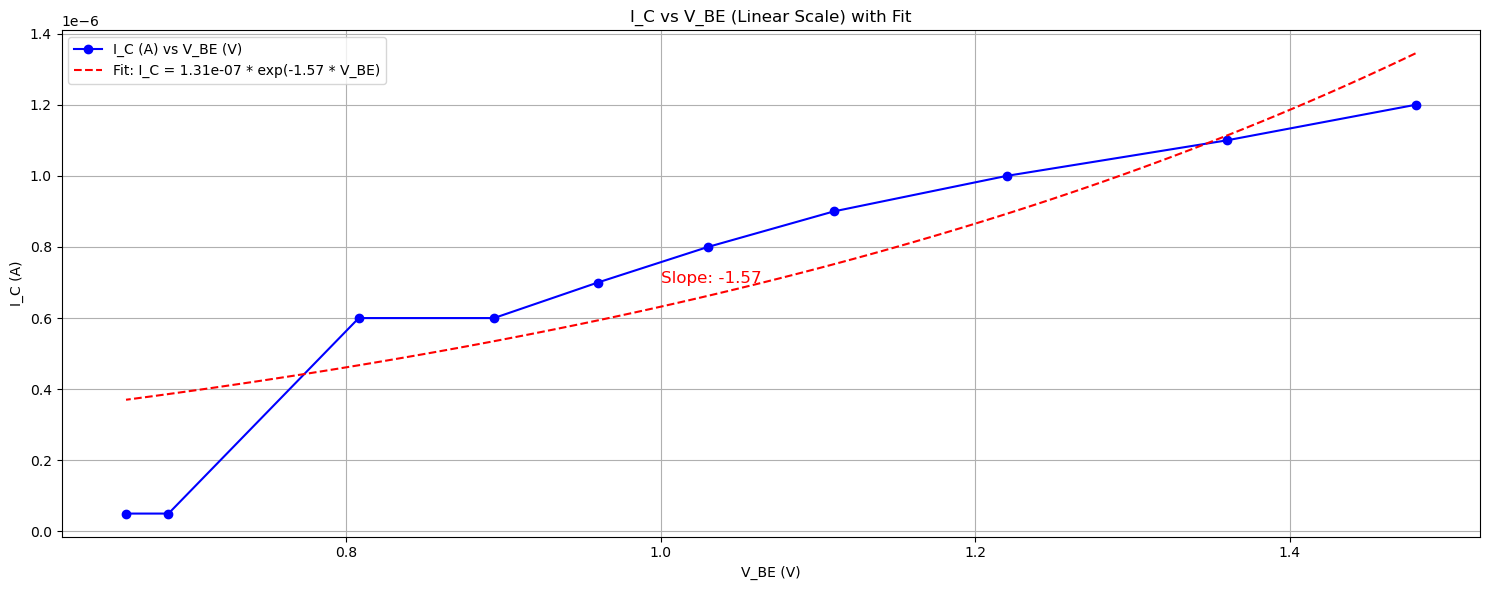

In [41]:
# Fit an exponential function to the I_C vs V_BE data
from scipy.optimize import curve_fit

# Define the exponential model for I_C = I_S * exp(V_BE / (kT/q))
def exp_model(V_BE, I_S, a):
    return I_S * np.exp(a * V_BE)

# Fit the exponential model to the data
params, covariance = curve_fit(exp_model, V_BE, I_C)
I_S_fit, a_fit = params

# Generate fitted values
V_BE_fit = np.linspace(min(V_BE), max(V_BE), 100)
I_C_fit = exp_model(V_BE_fit, I_S_fit, a_fit)

# Plot I_C vs V_BE on a linear scale with fit line
plt.figure(figsize=(15, 6))
plt.plot(V_BE_abs, I_C, 'o-', label='I_C (A) vs V_BE (V)', color='b')
plt.plot(abs(V_BE_fit), I_C_fit, '--', label=f'Fit: I_C = {I_S_fit:.2e} * exp({a_fit:.2f} * V_BE)', color='r')

# Adding labels and title
plt.xlabel('V_BE (V)')
plt.ylabel('I_C (A)')
plt.title('I_C vs V_BE (Linear Scale) with Fit')
plt.grid(True)

# Annotate the slope on the plot
plt.text(1, .0000007, f'Slope: {a_fit:.2f}', fontsize=12, color='red')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


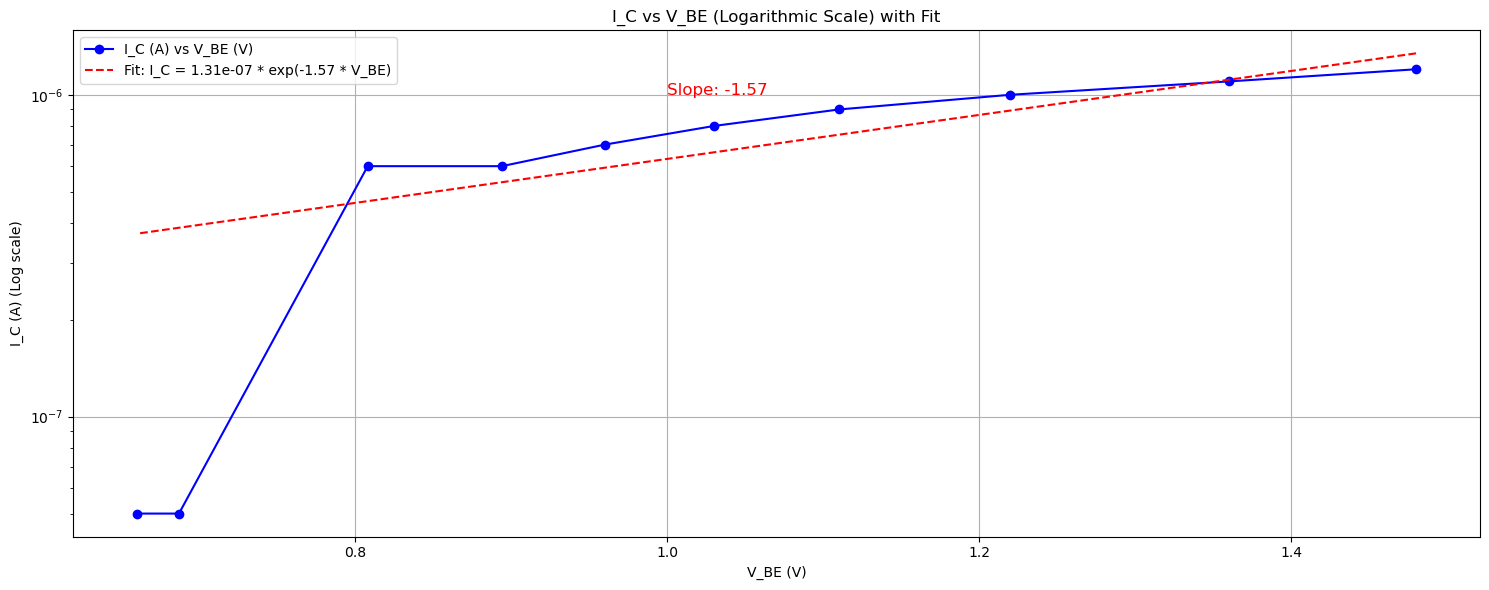

In [42]:
# Plot I_C vs V_BE on a logarithmic scale with fit line
plt.figure(figsize=(15, 6))
plt.semilogy(V_BE_abs, I_C, 'o-', label='I_C (A) vs V_BE (V)', color='b')
plt.semilogy(abs(V_BE_fit), I_C_fit, '--', label=f'Fit: I_C = {I_S_fit:.2e} * exp({a_fit:.2f} * V_BE)', color='r')

# Adding labels and title
plt.xlabel('V_BE (V)')
plt.ylabel('I_C (A) (Log scale)')
plt.title('I_C vs V_BE (Logarithmic Scale) with Fit')
plt.grid(True)

# Annotate the slope on the plot
plt.text(1.0, 1.0e-6, f'Slope: {a_fit:.2f}', fontsize=12, color='red')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

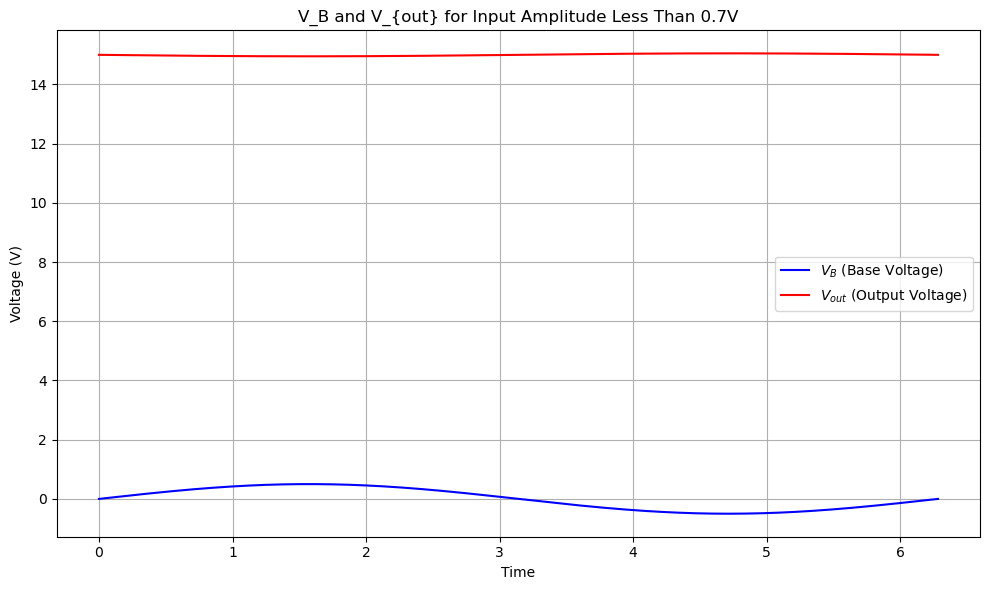

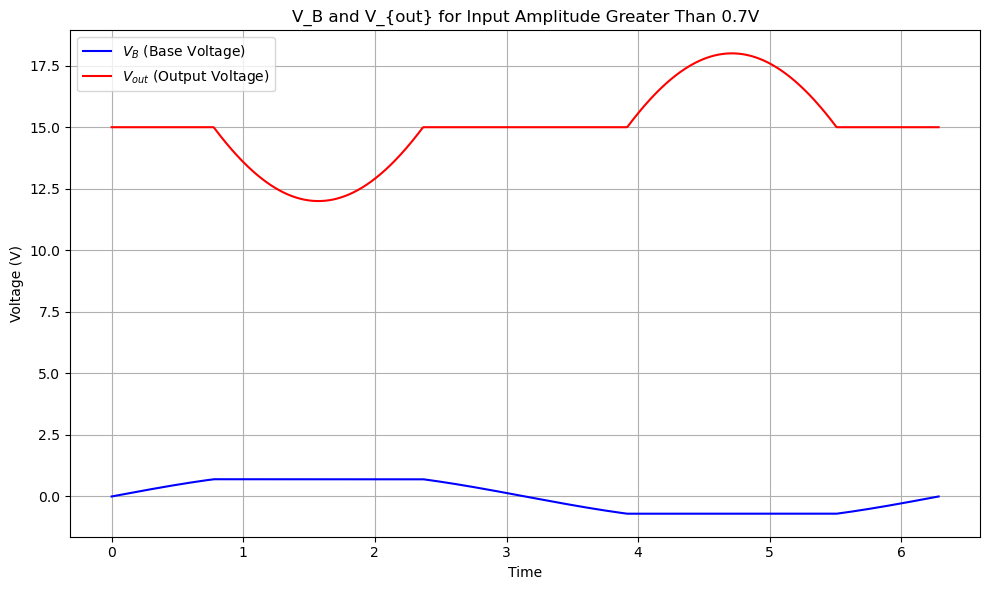

In [45]:
# Let's try saving again and generating links properly

# Time values for the sine wave
t = np.linspace(0, 2 * np.pi, 1000)

# Constants
V_CC = 15  # Supply voltage
V_in_low_amplitude = 0.5 * np.sin(t)  # Sine wave input (0.5 V peak-to-peak)
V_in_high_amplitude = 1.0 * np.sin(t)  # Sine wave input (1.0 V peak-to-peak)

# Case 1: Input amplitude less than 0.7V
V_B_low = V_in_low_amplitude  # Base voltage follows input (less than 0.7V)
V_out_low = V_CC - 0.1 * V_B_low  # Transistor not fully on, minimal current, high Vout

# Case 2: Input amplitude greater than 0.7V
V_B_high = np.clip(V_in_high_amplitude, -0.7, 0.7)  # Base voltage clamped at 0.7V
V_out_high = V_CC - 10 * (V_in_high_amplitude - V_B_high)  # Increased current, reduced Vout

# Plot the first case (V_in < 0.7V)
plt.figure(figsize=(10, 6))
plt.plot(t, V_B_low, label='$V_B$ (Base Voltage)', color='b')
plt.plot(t, V_out_low, label='$V_{out}$ (Output Voltage)', color='r')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('V_B and V_{out} for Input Amplitude Less Than 0.7V')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()

# Plot the second case (V_in > 0.7V)
plt.figure(figsize=(10, 6))
plt.plot(t, V_B_high, label='$V_B$ (Base Voltage)', color='b')
plt.plot(t, V_out_high, label='$V_{out}$ (Output Voltage)', color='r')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('V_B and V_{out} for Input Amplitude Greater Than 0.7V')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


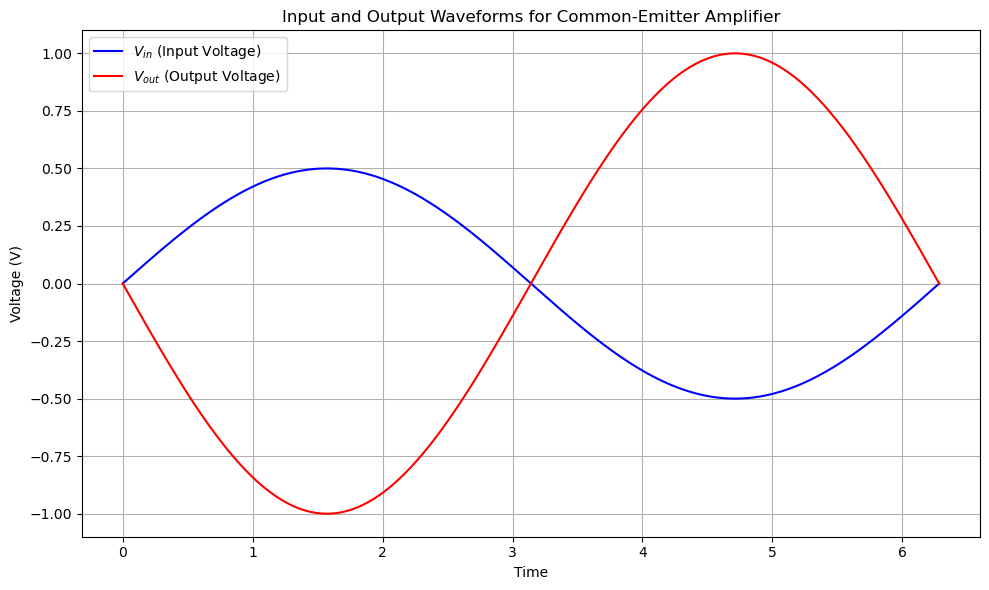

The calculated gain is: 2.0


2.0

In [49]:
# Re-trying without saving to file, simply displaying the result

# Time values for the sine wave
t = np.linspace(0, 2 * np.pi, 1000)

# Assumed input signal (1V peak-to-peak sine wave)
V_in = 0.5 * np.sin(t)  # 1V peak-to-peak

# Assumed gain for the common-emitter amplifier
gain = -2  # Typical gain

# Output signal (amplified and inverted)
V_out = gain * V_in  # Inverted and amplified by a factor of 2

# Plot the input and output waveforms
plt.figure(figsize=(10, 6))

# Plot input signal
plt.plot(t, V_in, label='$V_{in}$ (Input Voltage)', color='b')

# Plot output signal
plt.plot(t, V_out, label='$V_{out}$ (Output Voltage)', color='r')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Input and Output Waveforms for Common-Emitter Amplifier')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the gain, make sure it doesn't divid by zero. Just skip the value 
# if it is zero
V_in_max = max(V_in)
V_out_max = max(V_out)
if V_in_max == 0:
    calculated_gain = 0
else:
    calculated_gain = V_out_max / V_in_max
    print('The calculated gain is:', calculated_gain)



calculated_gain  # Display the calculated gain


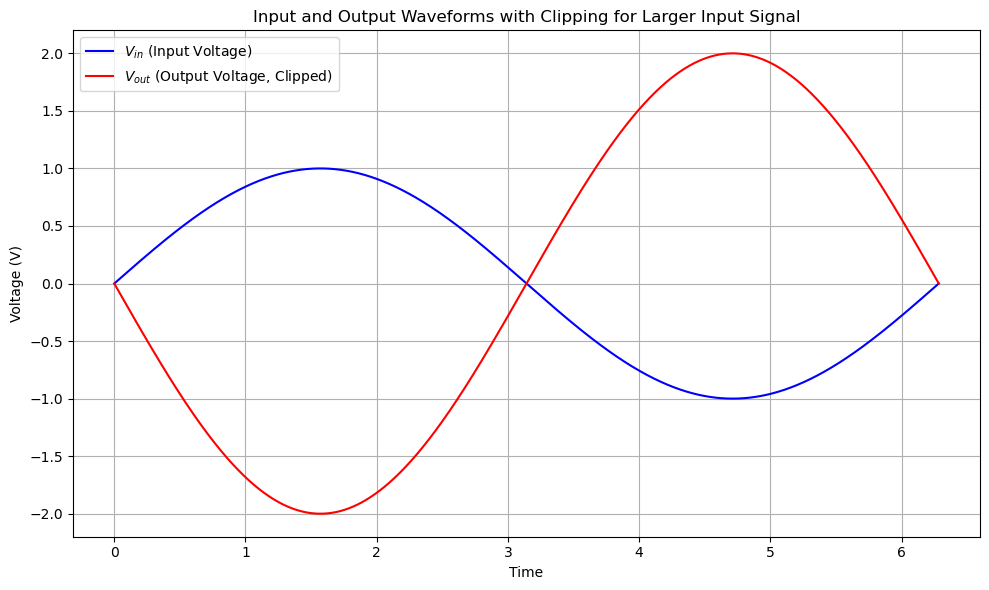

In [51]:
# Time values for the sine wave (same as previous)
t = np.linspace(0, 2 * np.pi, 1000)

# Assumed larger input signal (e.g., 2V peak-to-peak sine wave)
V_in_large = 1.0 * np.sin(t)  # 2V peak-to-peak

# Gain for the common-emitter amplifier (assumed same gain as before)
gain = -2

# Output signal (amplified and inverted)
# Assuming clipping occurs when output exceeds the supply voltage (15V)
V_out_clipped = gain * V_in_large
V_out_clipped = np.clip(V_out_clipped, -15, 15)  # Clip output at ±15V (V_CC)

# Plot the input and output waveforms (with clipping)
plt.figure(figsize=(10, 6))

# Plot input signal
plt.plot(t, V_in_large, label='$V_{in}$ (Input Voltage)', color='b')

# Plot output signal (clipped)
plt.plot(t, V_out_clipped, label='$V_{out}$ (Output Voltage, Clipped)', color='r')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Input and Output Waveforms with Clipping for Larger Input Signal')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Show the result (clipping) visually and save
